In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 그래프 설정
plt.rcParams['font.family']= 'Malgun Gothic'
# plt.rcParams['font.family']= 'AppleGothic'
plt.rcParams['font.size']  = 16
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터 가져오기
LCS = pd.read_csv("projectData/LCS1.csv", index_col=0)

In [4]:
LCS

,call_name,player_name,line,champion,game,win_rate,kill,death,assist,kda,win,lose,dpm
0,TL Alphari,Barney Morris1999.10.20,TOP,제이스,7,71.4%,4.0,1.9,7.7,6.3,5,2,722
1,TL Alphari,Barney Morris1999.10.20,TOP,카밀,5,80.0%,2.8,1.4,4.2,5.0,4,1,400
2,TL Alphari,Barney Morris1999.10.20,TOP,갱플랭크,5,60.0%,2.2,1.4,6.4,6.1,3,2,627
3,TL Alphari,Barney Morris1999.10.20,TOP,레넥톤,4,25.0%,1.8,2.8,6.0,2.8,1,3,336
4,TL Alphari,Barney Morris1999.10.20,TOP,나르,3,33.3%,1.3,1.3,4.7,4.5,1,2,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,FLY Dreams,한민국1996.03.07,SUP,탐 켄치,1,0%,1.0,4.0,0.0,0.3,0,1,143
661,FLY Dreams,한민국1996.03.07,SUP,쓰레쉬,1,0%,1.0,5.0,3.0,0.8,0,1,75
662,FLY Dreams,한민국1996.03.07,SUP,카르마,1,100.0%,2.0,3.0,17.0,6.3,1,0,156
663,FLY Dreams,한민국1996.03.07,SUP,라칸,1,0%,0.0,2.0,4.0,2.0,0,1,67


In [5]:
# 가장 많이 사용된 챔피언 

LCS.groupby('champion', as_index=False).sum().sort_values('game', ascending=False).head(10)

,champion,game,kill,death,assist,kda,win,lose,dpm
23,리 신,99,81.1,94.0,174.8,107.6,47,52,10343
39,비에고,86,86.5,66.7,129.4,120.0,42,44,9873
17,레오나,74,6.5,35.3,76.1,25.3,37,37,1060
33,바루스,67,30.7,27.0,53.0,40.9,34,33,6883
11,다이애나,61,39.9,33.3,92.8,54.3,41,20,5050
6,노틸러스,56,7.4,28.4,78.9,33.6,31,25,1377
16,레넥톤,52,25.3,39.6,62.3,33.1,29,23,4642
52,신 짜오,52,24.1,33.5,53.9,32.4,28,24,3393
74,이즈리얼,52,45.1,24.3,63.3,63.4,24,28,9045
101,트리스타나,49,57.8,39.3,77.4,76.3,28,21,8297


- 여기도 생각보다 트리스타나를 많이 쓴다
- 메이저리그중에 트타에 관심없는건 LCK 뿐이었다
- LCK랑 비슷한 느낌이 들면서도 탑5 아래쪽으로 내려갈수록 라인전이 강한 픽

In [6]:
# 총 사용된 챔피언 수
len(LCS.groupby('champion', as_index=False).sum().sort_values('game', ascending=False))

106

- 가장 많은 챔피언이 사용된 리그는 LCS
- 가장 챔피언이 적게 활용된 리그는 LCK 였음

In [7]:
# DPM은 원딜들이 확실히 높음
LCS.groupby('champion', as_index=False).mean().sort_values('dpm', ascending=False).nlargest(10,'dpm')

,champion,game,kill,death,assist,kda,win,lose,dpm
56,아리,1.000000,7.000000,2.000000,9.000000,8.000000,1.000000,0.000000,862.000000
74,이즈리얼,4.000000,3.469231,1.869231,4.869231,4.876923,1.846154,2.153846,695.769231
92,케이틀린,1.000000,3.000000,1.000000,5.000000,8.000000,1.000000,0.000000,680.000000
33,바루스,6.090909,2.790909,2.454545,4.818182,3.718182,3.090909,3.000000,625.727273
1,갱플랭크,3.714286,1.971429,2.471429,5.057143,4.114286,1.571429,2.142857,613.000000
40,빅토르,2.333333,3.333333,2.333333,5.066667,5.066667,2.000000,0.333333,602.666667
79,조이,1.250000,3.125000,4.875000,7.000000,2.450000,0.500000,0.750000,602.250000
98,탈리야,1.000000,4.000000,3.000000,5.000000,3.000000,0.000000,1.000000,602.000000
50,스웨인,1.000000,4.000000,3.000000,9.000000,4.300000,1.000000,0.000000,598.000000
35,베인,2.000000,6.500000,1.500000,11.500000,12.000000,2.000000,0.000000,581.000000


# 다른 정보도 확인하기 위해 데이터 변경

In [8]:
LCS = pd.read_csv('projectData/LCS3_RESULT.csv', index_col=0, encoding='CP949')
LCS['version'] = LCS['version'].str.replace('버전','')
LCS['version'] = LCS['version'].str.replace(' ','')
LCS['version'] = LCS['version'].str.replace('<!----><!---->','')
ind = LCS[LCS['version'] == '11.5'].index
LCS = LCS.drop(index=ind)
LCS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 669
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_date          905 non-null    object
 1   version            905 non-null    object
 2   team1_name         905 non-null    object
 3   team1_score        905 non-null    int64 
 4   team2_score        905 non-null    int64 
 5   team2_name         905 non-null    object
 6   gametime           905 non-null    object
 7   blue_team          905 non-null    object
 8   blue_score         905 non-null    int64 
 9   blue_ban           905 non-null    object
 10  blue_object        905 non-null    object
 11  blue_object_count  905 non-null    int64 
 12  blue_call_name     905 non-null    object
 13  blue_line          905 non-null    object
 14  blue_champion      905 non-null    object
 15  blue_kill          905 non-null    int64 
 16  blue_death         905 non-null    object
 1

In [9]:
# 챔피언 활용도 체크
a = LCS['blue_champion'].value_counts().head(8)
b = LCS['red_champion'].value_counts().head(8)

In [10]:
# 파렛트 설정
sns.set_palette('Pastel2')

C:\Users\LUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


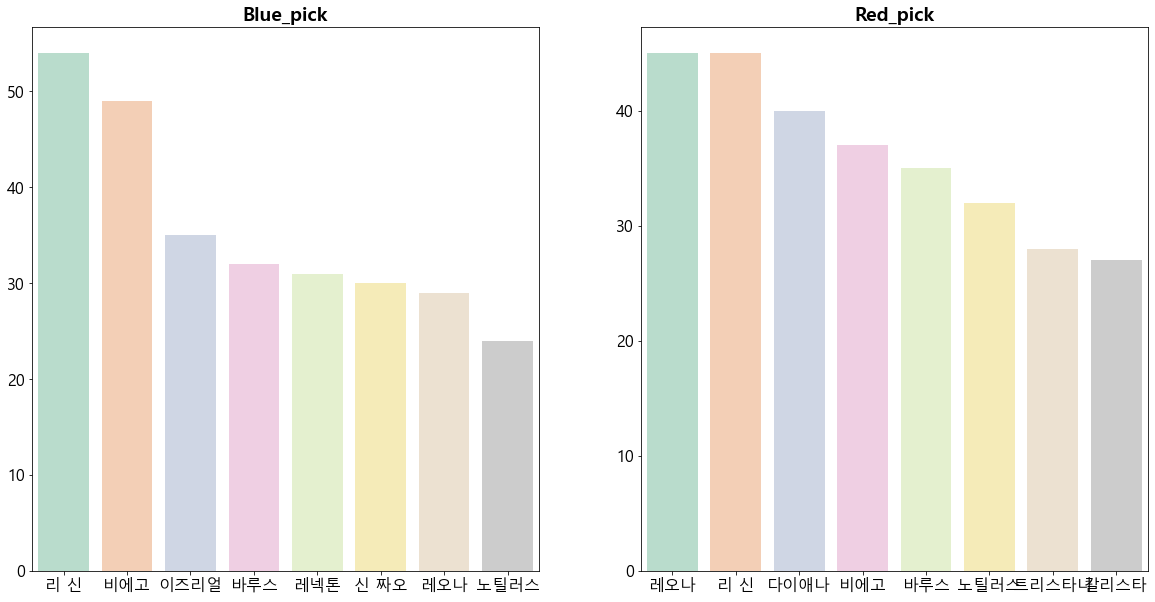

In [11]:
# 시각화해서 진영별 픽 확인
fig, ax1= plt.subplots(nrows=1, ncols=2, figsize=(20,10))


sns.barplot(a.index, a.values, ax=ax1[0])
ax1[0].set_title('Blue_pick', weight = 'bold')

sns.barplot(b.index, b.values, ax=ax1[1])
ax1[1].set_title('Red_pick', weight = 'bold')


plt.show()

- 블루쪽에서 이즈리얼, 바루스같은 원딜픽이 많이보인다
- 레드가 바루스 가져가면 이즈리얼 가져오는 형태일 거같음
- LCK와 유사한 픽형태로 리신, 비에고 가져가면 레드가 다이애나 가져오는 형태 아닐까


In [12]:
# 픽 말고 밴이 가장 많이된 챔프를 확인해보자
ban_a  =LCS[['blue_ban']]
ban_a.columns=['ban']
ban_b  =LCS[['red_ban']]
ban_b.columns=['ban']
ban_all =pd.concat([ban_a,ban_b])

In [13]:
# 밴카드 상위 10개 확인
ban_all.value_counts().head(10)

ban 
쓰레쉬     112
신 짜오    107
레넥톤      90
칼리스타     80
그웬       75
비에고      69
르블랑      67
바루스      57
루시안      56
리 신      53
dtype: int64

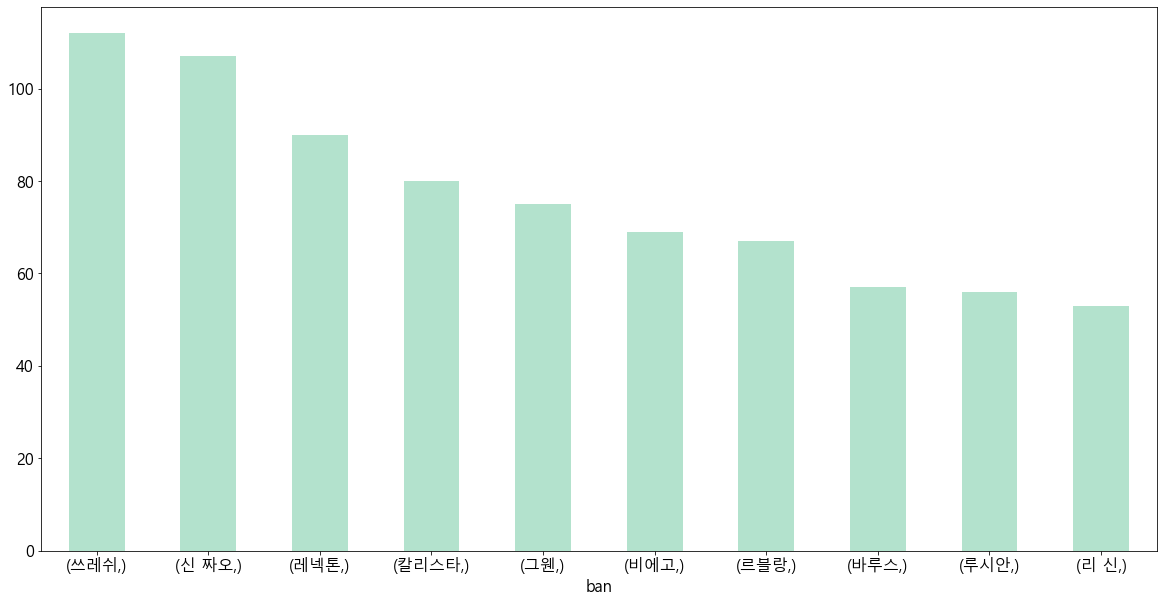

In [14]:
# 그래프 형태로 정리해서 확인
ban_all.value_counts().head(10).plot.bar(rot=0)
plt.show()

- 쓰레쉬에 벤을 많이 투자함
- 유틸 서폿을 활용하는 것도 아닌데 왜 쓰레쉬를 벤하는 걸까
- 그 밖에 신짜오, 레넥톤, 칼리스타 같이 초반 강력한 챔프들

In [15]:
# 데이터 잠시 바꿔서 확인해보겠음
LCS2 = pd.read_csv("projectData/LCS1.csv", index_col=0)

In [16]:
LCS2[LCS2['champion'] == '아펠리오스'].groupby('champion').sum()

,game,kill,death,assist,kda,win,lose,dpm
champion,,,,,,,,
아펠리오스,41,23.1,23.3,25.7,26.6,15,26,4437


In [17]:
LCS2[LCS2['champion'] == '징크스'].groupby('champion').sum()

,game,kill,death,assist,kda,win,lose,dpm
champion,,,,,,,,
징크스,8,13.0,14.5,6.8,7.9,2,6,2374


In [18]:
ban_all[ban_all['ban'] =='아펠리오스'].count()

ban    15
dtype: int64

- 쓰레쉬를 벤하는 이유가 아펠리오스,징크스 같은 하드캐리 원딜에 대한 고평가에 있지않을까 생각했음
- 근데 둘 다 생각보다 그렇게 좋은 성적은 아님
- 랜턴이나 그랩같은 스킬셋을 가진 쓰레쉬 자체에 대한 고평가인듯

## 오브젝트 확인

In [19]:
LCS_object = LCS[['blue_object','blue_object_count','red_object','red_object_count']]
LCS_object

,blue_object,blue_object_count,red_object,red_object_count
0,turret@blue,8,turret@red,1
1,inhibitor@blue,1,inhibitor@red,0
2,baron@blue,1,baron@red,0
3,dragon@blue,4,dragon@red,0
4,riftHerald@blue,2,riftHerald@red,0
...,...,...,...,...
665,turret@blue,4,turret@red,11
666,inhibitor@blue,0,inhibitor@red,3
667,baron@blue,0,baron@red,3
668,dragon@blue,1,dragon@red,6


In [20]:
# 터렛,억제기만 가져오기
LCS_turret = LCS_object[LCS_object['blue_object'] == 'turret@blue']

LCS_turret = LCS_turret.drop(columns=['blue_object','red_object'])

In [21]:
# 터렛 파괴 갯수를 경기수로 나누기

round(LCS_turret.sum()/(len(LCS)/5), 2)

blue_object_count    6.10
red_object_count     6.12
dtype: float64

In [22]:
# 전령 관련 수치 확인
LCS_riftHerald  = LCS_object[LCS_object['blue_object'] == 'riftHerald@blue']
LCS_riftHerald = LCS_riftHerald.drop(columns=['blue_object','red_object'])

In [23]:
round(LCS_riftHerald.sum()/(len(LCS)/5), 2)

blue_object_count    1.04
red_object_count     0.91
dtype: float64

In [24]:
LCS_baron = LCS_object[LCS_object['blue_object'] == 'baron@blue']
LCS_baron= LCS_baron.drop(columns=['blue_object','red_object'])

In [25]:
round(LCS_baron.sum()/(len(LCS)/5), 2)

blue_object_count    0.59
red_object_count     0.77
dtype: float64

- LCS도 바론은 레드가 더 잘먹음

In [26]:
LCS_baron.value_counts()

blue_object_count  red_object_count
0                  1                   58
1                  0                   56
0                  2                   20
1                  1                   13
2                  0                   12
0                  0                    8
                   3                    5
1                  2                    4
2                  1                    3
1                  3                    1
3                  0                    1
dtype: int64